Primero queremos leer y graficar los datos pertenecientes a la funcion luminosidad de galaxias obtenida por Blanton et al. (2001).

In [128]:
#!pip install sympy


Quiero explorar el espacio de parametros

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [130]:
datos=pd.read_csv('/home/camila/Documentos/practico1_astrometria/repositorio/practico4/datos_Blanton2001.csv')
datos

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000002,0.000003
1,-23.020,0.000005,0.000003,0.000005
2,-22.870,0.000017,0.000005,0.000009
3,-22.698,0.000035,0.000009,0.000010
4,-22.565,0.000082,0.000024,0.000023
5,-22.411,0.000122,0.000017,0.000020
6,-22.248,0.000241,0.000034,0.000040
7,-22.096,0.000328,0.000038,0.000043
8,-21.942,0.000504,0.000059,0.000084
9,-21.793,0.000933,0.000133,0.000091


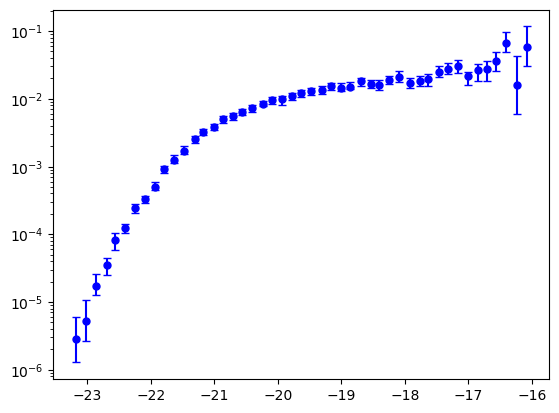

In [131]:
x=datos['MAG']
y=datos['PHI']
error_sup= datos['error_sup']
error_inf= datos['error_inf']
#Los datos de error estan invertidos 

plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3)
plt.yscale('log')
plt.show()

Funcion de likehood $L=\prod \frac{1}{\sigma*sqrt(2*pi)}\exp(\frac{(y-y_(model))²}{2*\sigma²})$ 

Funcion  $\log(L)=A-\sum (y-y_(model))²/2*\sigma²$

Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

Vamos a modelar la funcion schechter primero para 

In [132]:
#Defino la funcion schechter
def schechter(M,phi0,a0,M0):
    a=(0.4)*np.log(10)*phi0
    b=10**((-0.4)*(M-M0)*(a0+1))
    c=np.exp(-10**(-0.4*(M-M0)))
    fun=(a*b*c)
    return(fun)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_144642/1133145756.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


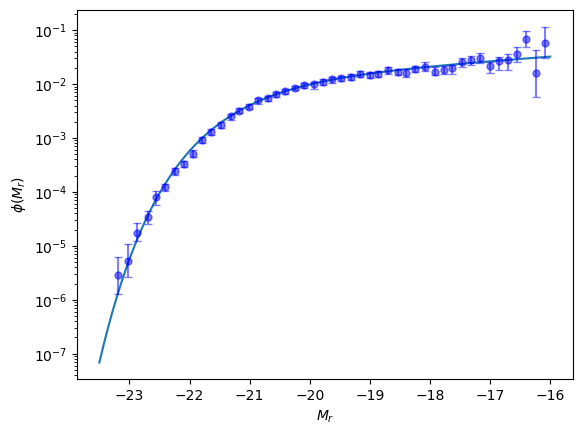

In [133]:
M1=np.linspace(-23.5,-16,100)
plt.plot(M1,schechter(M=M1,phi0=1.46e-2,a0=-1.20,M0=-20.83))
plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3,alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.show()

Para explorar cómo cada parámetro afecta al ajuste del modelo de Schechter, puedes realizar lo siguiente:

Ajustar un parámetro a la vez: Podemos fijar todos los parámetros excepto uno y variar ese único parámetro en un rango determinado. Esto te permitirá ver cómo cambia la forma de la función de luminosidad (es decir, cómo afecta el parámetro al modelo).

Visualizar las variaciones: Para cada parámetro, se puede graficar el modelo de Schechter con el parámetro varíando mientras los otros se mantienen constantes, y observar cómo la curva cambia en respuesta.

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_144642/1933796411.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


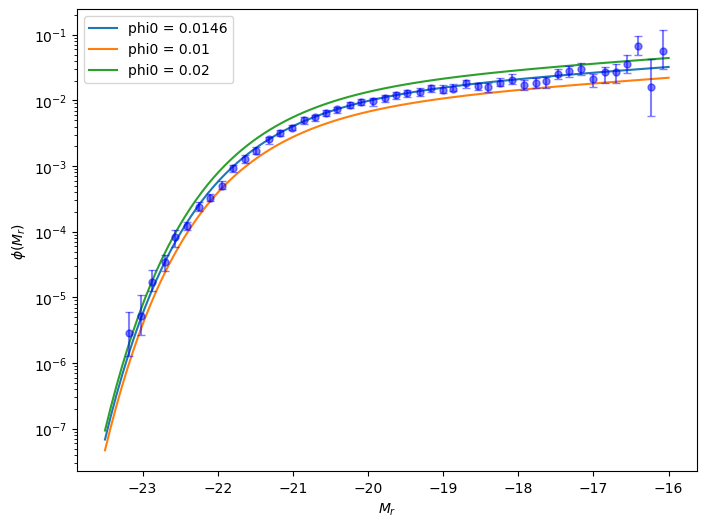

In [134]:
phi0_values = [1.46e-2, 1.0e-2, 2.0e-2]  # Diferentes valores para phi0
M1 = np.linspace(-23.5, -16, 100)

plt.figure(figsize=(8,6))
for phi0_val in phi0_values:
    plt.plot(M1, schechter(M=M1, phi0=phi0_val, a0=-1.20, M0=-20.83), label=f'phi0 = {phi0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_144642/2425257006.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


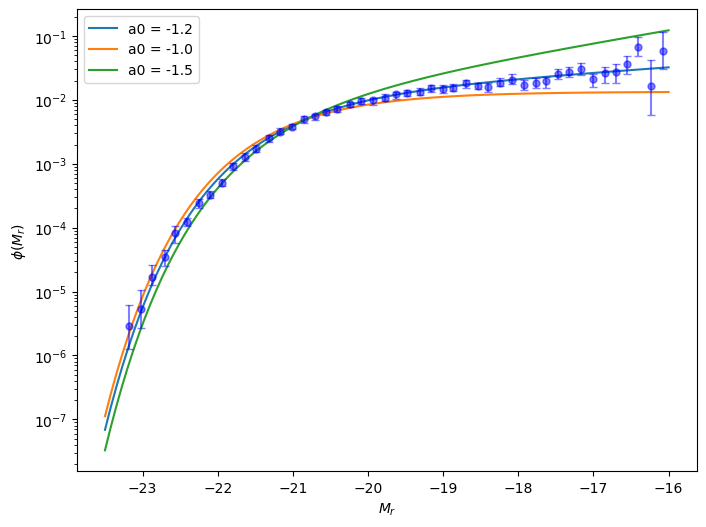

In [135]:
a0_values = [-1.20, -1.0, -1.5]  # Diferentes valores para a0

plt.figure(figsize=(8,6))
for a0_val in a0_values:
    plt.plot(M1, schechter(M=M1, phi0=1.46e-2, a0=a0_val, M0=-20.83), label=f'a0 = {a0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_144642/855279916.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


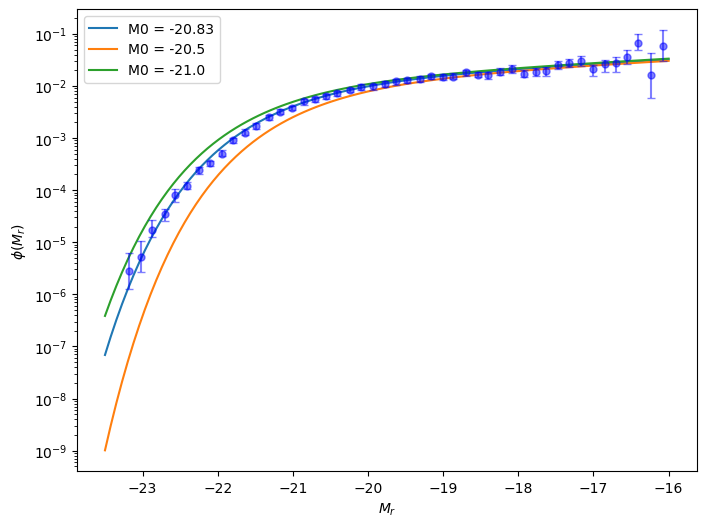

In [136]:
M0_values = [-20.83, -20.5, -21.0]  # Diferentes valores para M0

plt.figure(figsize=(8,6))
for M0_val in M0_values:
    plt.plot(M1, schechter(M=M1, phi0=1.46e-2, a0=-1.20, M0=M0_val), label=f'M0 = {M0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


phi0: Cambiar este parámetro afecta la altura de la curva, es decir, cómo de densa es la distribución de galaxias en las magnitudes más brillantes.
a0: Este parámetro controla la pendiente de la función, determinando cómo decrece la densidad de galaxias con magnitudes más brillantes.
M0: Al modificar M0, cambiarás la posición de la "bajada" o la "curvatura" de la curva en el gráfico, ya que esto ajusta la magnitud característica de la distribución.

#Ahora definimos la funcion likehood, prior y probabilidad posterios

In [137]:
sigma= np.abs((datos['error_sup'] + datos['error_inf'])/2) 

In [138]:
def log_likelihood(y, M, phi0, a0, M0, sigma):
    # Calculamos el modelo de Schechter para cada valor de M
    y_model = schechter(M, phi0, a0, M0)
    
    # Calculamos la log-verosimilitud
    logL = -0.5 * np.sum(((y - y_model)**2)/(sigma**2))  # La constante A está incluida en la normalización
    return logL

In [139]:
logL = log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma)
print(f"Log-verosimilitud: {logL}")

Log-verosimilitud: -14.859379959532204


In [140]:
log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=0.03, a0=-1.9, M0=-22, sigma=sigma) # Prueba con otros valores

-776279.6276848193

La función de log-verosimilitud definida está diseñada para ser minimizada durante el proceso de ajuste de parámetros. Este tipo de formulación de la log-verosimilitud está basado en una distribución normal (o gaussiana) de los residuos. La forma general de la log-verosimilitud para un ajuste de parámetros en modelos de este tipo es siempre negativa, ya que la log-verosimilitud se construye a partir de un error cuadrático, que se minimiza

In [141]:
def prior(phi0, a0, M0,phi0lim, M0lim, alim):
    
    if (phi0lim[0]<=phi0) & (phi0<=phi0lim[1]) & (M0lim[0]<=M0) & (M0<=M0lim[1]) & (alim[0]<=a0) & (a0<=alim[1]):
        return 1.0  # Valor constante para la distribución plana
    else:
        return 0.0  # Cero fuera del rango

In [142]:
# Elegimos rangos razonables basados en la literatura y el comportamiento de los datos
phi0lim = [1e-3, 1e-1]  # Valor de phi0 entre 1e-3 y 1e-1
M0lim = [-22, -19]  # Magnitud característica entre -22 y -19
alim = [-2, -0.5]  # Valor de a0 entre -2 y -0.5

In [143]:
phi0 = 1.46e-2
a0 = -1.20
M0 = -20.83

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")


Prior: 1.0


In [144]:
#prueba prior
phi0 = 1.46e-2
a0 = -1.20
M0 = -22.5

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")

Prior: 0.0


Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

In [145]:
#A continuacion utilizamos el teorema de Bayes para definir la probabilidad posterior
def prob_post(y, M, phi0, a0, M0, sigma,phi0lim, M0lim, alim):
    log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))
    return(log_pos)

In [146]:
# Llamada a la función para calcular la probabilidad posterior
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

-14.859379959532204

In [147]:
#La llamamos con otros valores 
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-20, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

-375.49053327188466

In [148]:
prob_post_value_1 = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
prob_post_value_2 = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-22, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

print(f"Probabilidad posterior 1: {prob_post_value_1}")
print(f"Probabilidad posterior 2: {prob_post_value_2}")

Probabilidad posterior 1: -14.859379959532204
Probabilidad posterior 2: -452652.64291423425


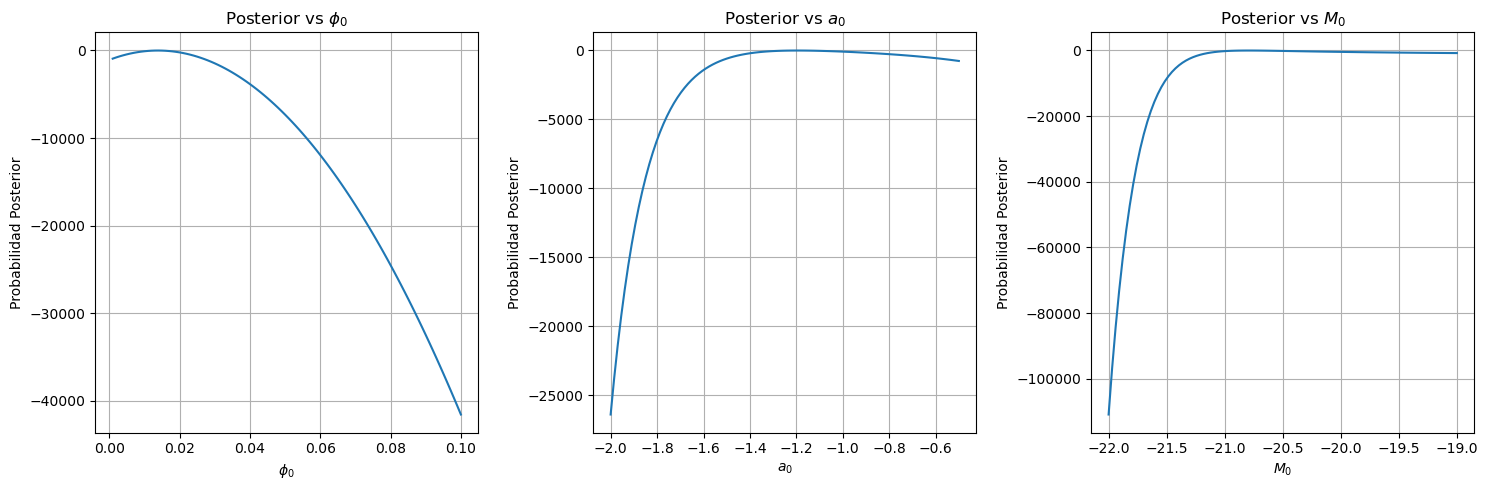

In [149]:


# Valores de ejemplo para phi0, a0 y M0
phi0_values = np.linspace(phi0lim[0], phi0lim[1], 100)
a0_values = np.linspace(alim[0], alim[1], 100)
M0_values = np.linspace(M0lim[0], M0lim[1], 100)

# Inicializar un contenedor para las probabilidades posteriores
posterior_phi0 = np.zeros_like(phi0_values)
posterior_a0 = np.zeros_like(a0_values)
posterior_M0 = np.zeros_like(M0_values)

# Evaluar la probabilidad posterior para cada valor de phi0
for i, phi0 in enumerate(phi0_values):
    posterior_phi0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=-1.20, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de a0
for i, a0 in enumerate(a0_values):
    posterior_a0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=a0, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de M0
for i, M0 in enumerate(M0_values):
    posterior_M0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=M0, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para phi0
plt.subplot(1, 3, 1)
plt.plot(phi0_values, posterior_phi0)
plt.title(r'Posterior vs $\phi_0$')
plt.xlabel(r'$\phi_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para a0
plt.subplot(1, 3, 2)
plt.plot(a0_values, posterior_a0)
plt.title(r'Posterior vs $a_0$')
plt.xlabel(r'$a_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para M0
plt.subplot(1, 3, 3)
plt.plot(M0_values, posterior_M0)
plt.title(r'Posterior vs $M_0$')
plt.xlabel(r'$M_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

plt.tight_layout()
plt.show()

Metropolis-Hasting:
Utilizamos las funciones antes definidas para generar el algoritmo de la cadena, donde busca un punto con una cierta probabilidad, salta a otro punto de manera aleatorea y luego evalurara la funcion likehood en este punto, el cual comparara con el punto anterior, quiero que el valor de mayor a uno, lo que indicaria que el valor es mejor, entonces lo tomo y a partir de ese punto siga recorriendo el espacio de parametros.


In [150]:
#Debo definir la funcion de metropolis hasting
# Elegimos rangos razonables basados en la literatura y el comportamiento de los datos
phi0lim = [0.001, 0.02]  # Valor de phi0 entre 1e-3 y 1e-1
M0lim = [-21.5, -20]  # Magnitud característica entre -22 y -19
alim = [-1.6, -1]  # Valor de a0 entre -2 y -0.5

a0=np.random.uniform(alim[0],alim[1])
phi0=np.random.uniform(phi0lim[0],phi0lim[1])
M0=np.random.uniform(M0lim[0],M0lim[1])
y=datos['PHI']
M=datos['MAG']
#Normalizo el a0,M0,phi0 para darle el mismo paso
#a_norm=(a0-alim[0])/(alim[1]-alim[0])
#M0_norm=(M0-M0lim[0])/(M0lim[1]-M0lim[0])
#phi0_norm=(phi0-phi0lim[0])/(phi0lim[1]-phi0lim[0])
#step=1e-2
#Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
#a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
#M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
#phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])

def metropolis_hasting(y=y, M=M, phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim,N_iter=10000):
    p0 = prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
    a0_lista=[]
    M0_lista=[]
    phi0_lista=[]
    posteriores=[]
    
    for i in range(N_iter):
        step=1e-1
        #print(i)
        #Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
        a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
        M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
        phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])
        p_nueva=prob_post(y=y, M=M, phi0=phi0_nuevo, a0=a_nuevo, M0=M_nuevo,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
        #print(p0,p_nueva,p_nueva-p0)
        if p_nueva-p0>=0:
            a0=a_nuevo
            M0=M_nuevo
            phi0=phi0_nuevo
            p0=p_nueva
        else:
            u = p_nueva-p0
            r = np.log(np.random.rand())
            #print(u,r)
            if r<u:
                a0=a_nuevo
                M0=M_nuevo
                phi0=phi0_nuevo
                p0=p_nueva
            #Si no se cumple esta condicion, no quiero que haga nada, me quedo en donde estoy
        a0_lista.append(a0)
        M0_lista.append(M0)
        phi0_lista.append(phi0)
        posteriores.append(p0)
    return(a0_lista,M0_lista,phi0_lista,posteriores)
#print(a0,M0,phi0)
#metropolis_hasting(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

In [151]:
# Llamar a la función metropolis_hasting y obtener los resultados en variables
a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
    y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, 
    sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
)

/tmp/ipykernel_144642/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


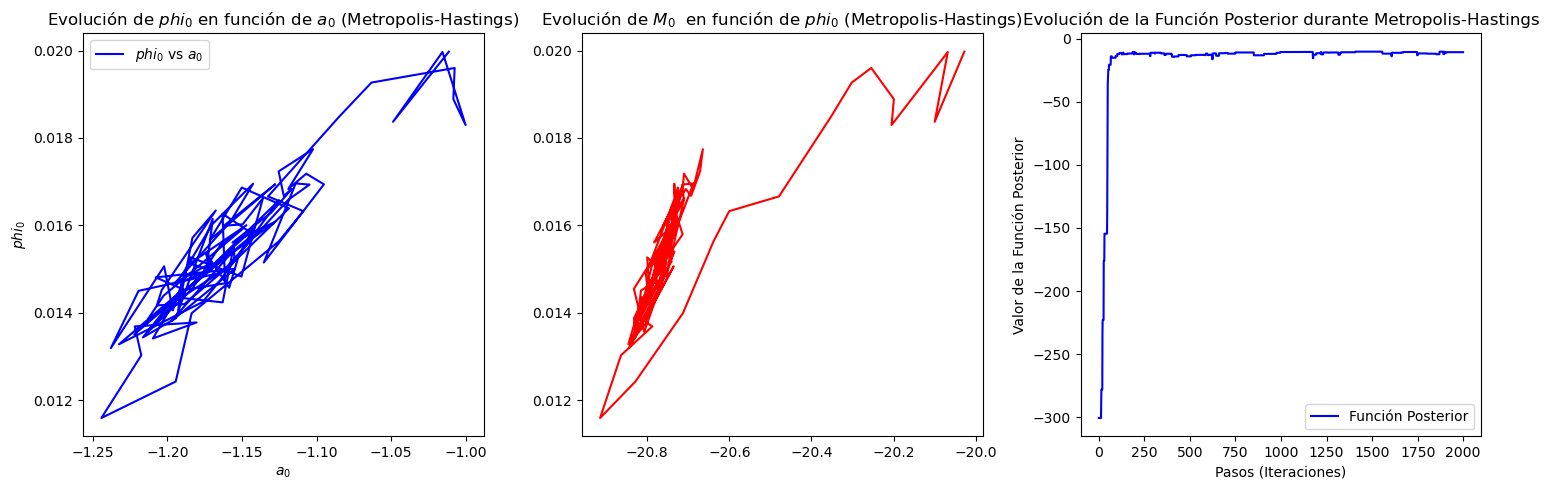

In [174]:

# Graficar phi0 vs a0
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.plot(a0_lista, phi0_lista, label=r'$phi_0$ vs $a_0$', color='b')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$phi_0$')
plt.title('Evolución de $phi_0$ en función de $a_0$ (Metropolis-Hastings)')
plt.legend()
#Graficar M0 en funcion de phi0
plt.subplot(1, 4, 2)
plt.plot(M0_lista, phi0_lista, label=r'$M_0$ vs $phi_0$', color='r')
plt.title('Evolución de $M_0$  en función de $phi_0$ (Metropolis-Hastings)')
# Graficar la función posterior en función de los pasos
plt.subplot(1, 4, 3)
plt.plot(posteriores, label="Función Posterior", color='blue')
plt.xlabel("Pasos (Iteraciones)")
plt.ylabel("Valor de la Función Posterior")
plt.title("Evolución de la Función Posterior durante Metropolis-Hastings")
plt.tight_layout()

plt.legend()
plt.show()


Observamos que las cadenas caminan y convergen a una cierta region del grafico, lo cual es algo que esperamos, ademas la funcion posterior tiene una tendencia de convergencia.

Ejercicio 3 y 4:
Queremos visualizar las propiedades de convergencia de las cadenas y analizar la eleccion de parametros que produzcan un buen mezclado de las cadenas, de manera que corremos varias cadenas.
Quiero crear muchas cadenas que surjan de distintas regiones y ver la convergencia de esas cadenas.

/tmp/ipykernel_144642/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


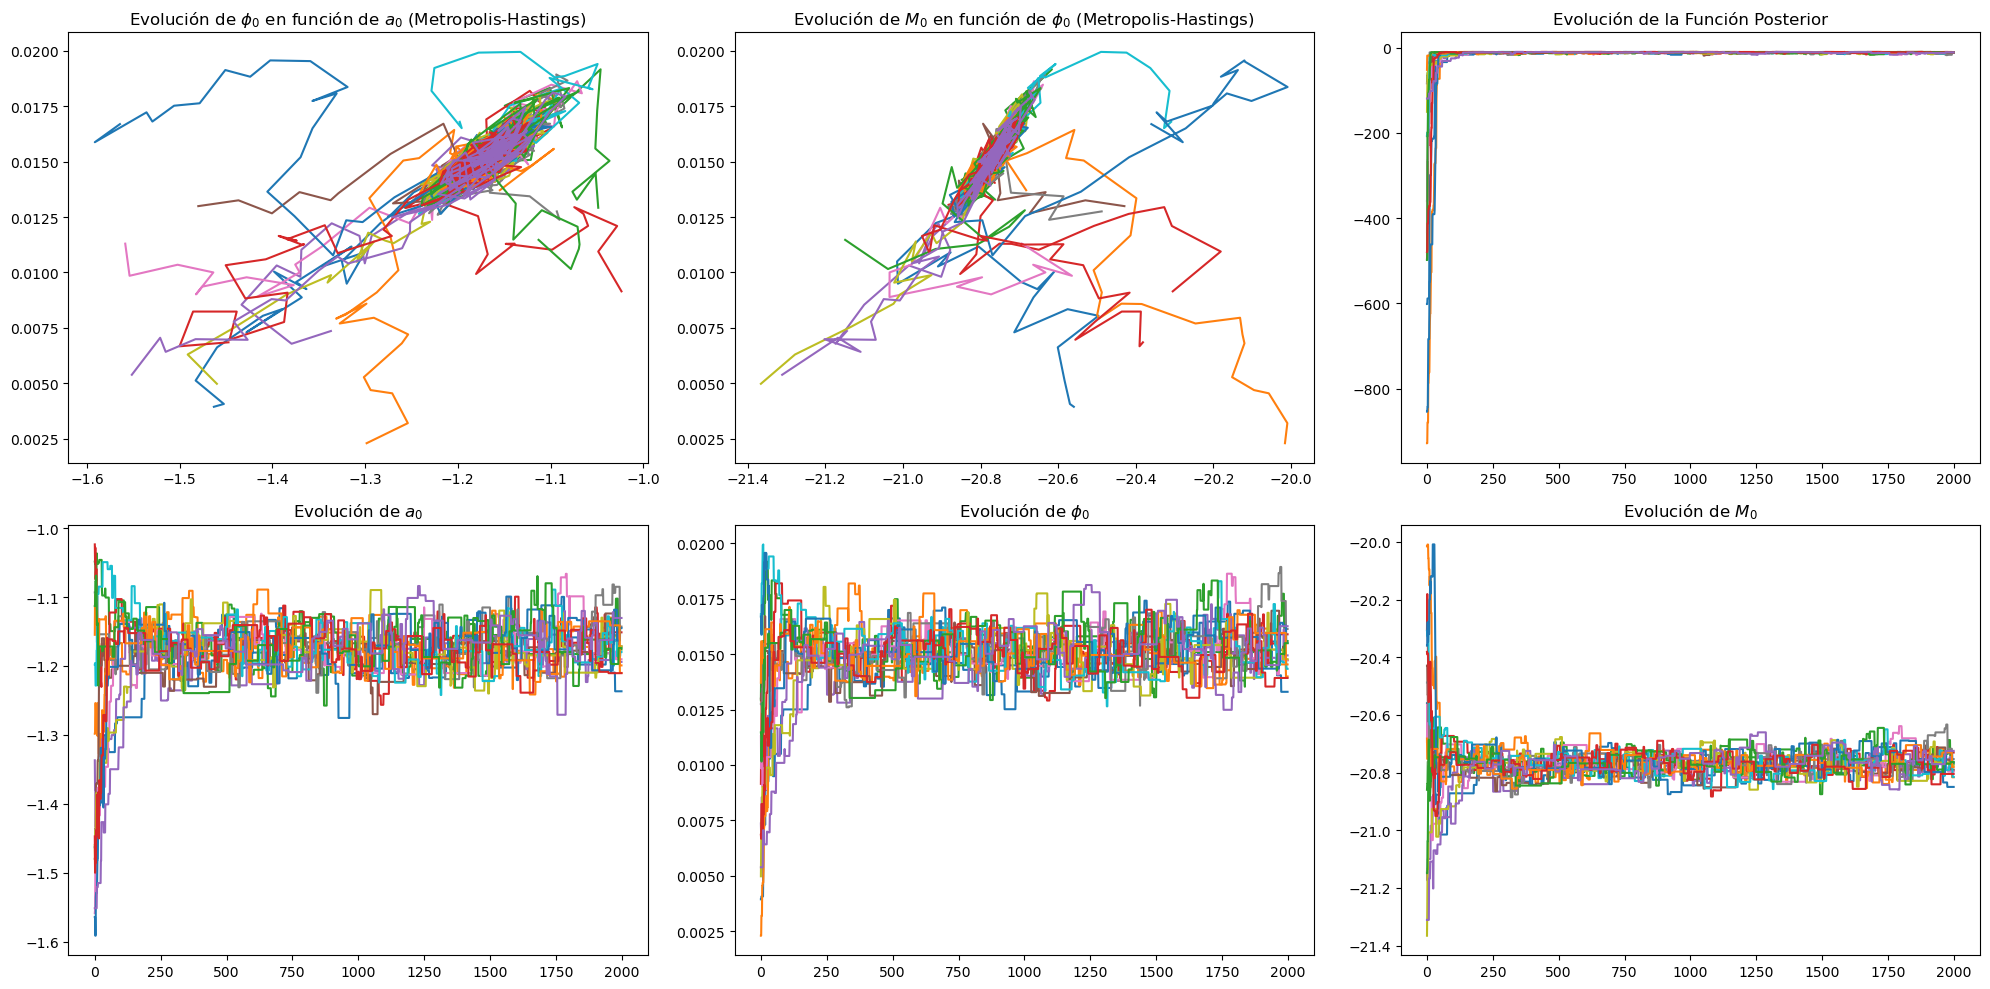

In [182]:
#Generamos aleatoriamente parametros para construir la cadena, teniendo en cuenta los parametros iniciales
fig, axs = plt.subplots(2,3,figsize=(20, 10))

N=15
for i in range(N):
    a0=np.random.uniform(alim[0],alim[1])
    phi0=np.random.uniform(phi0lim[0],phi0lim[1])
    M0=np.random.uniform(M0lim[0],M0lim[1])
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
    y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, 
    sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
    )
    # Graficar phi0 vs a0
    axs[0,0].plot(a0_lista, phi0_lista, label=f'cadena_{i}')
    axs[0,1].plot(M0_lista, phi0_lista, label=f'cadena_{i}')
    axs[0,2].plot(posteriores, label="Función Posterior")
    axs[1,0].plot(a0_lista)
    axs[1,1].plot(phi0_lista)
    axs[1,2].plot(M0_lista)    

axs[0, 0].set_title(r'Evolución de $\phi_0$ en función de $a_0$ (Metropolis-Hastings)')
axs[0, 1].set_title(r'Evolución de $M_0$ en función de $\phi_0$ (Metropolis-Hastings)')
axs[0, 2].set_title('Evolución de la Función Posterior')
axs[1, 0].set_title(r'Evolución de $a_0$')
axs[1, 1].set_title(r'Evolución de $\phi_0$')
axs[1, 2].set_title(r'Evolución de $M_0$')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()
plt.show()


Observamos que todos inician del mismo punto y convergen al mismo punto, esto es esperado dado que se tiene un solo maximo.
Bastaria ver con malos mezclados y comparar con las mezclas buenas.

/tmp/ipykernel_144642/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


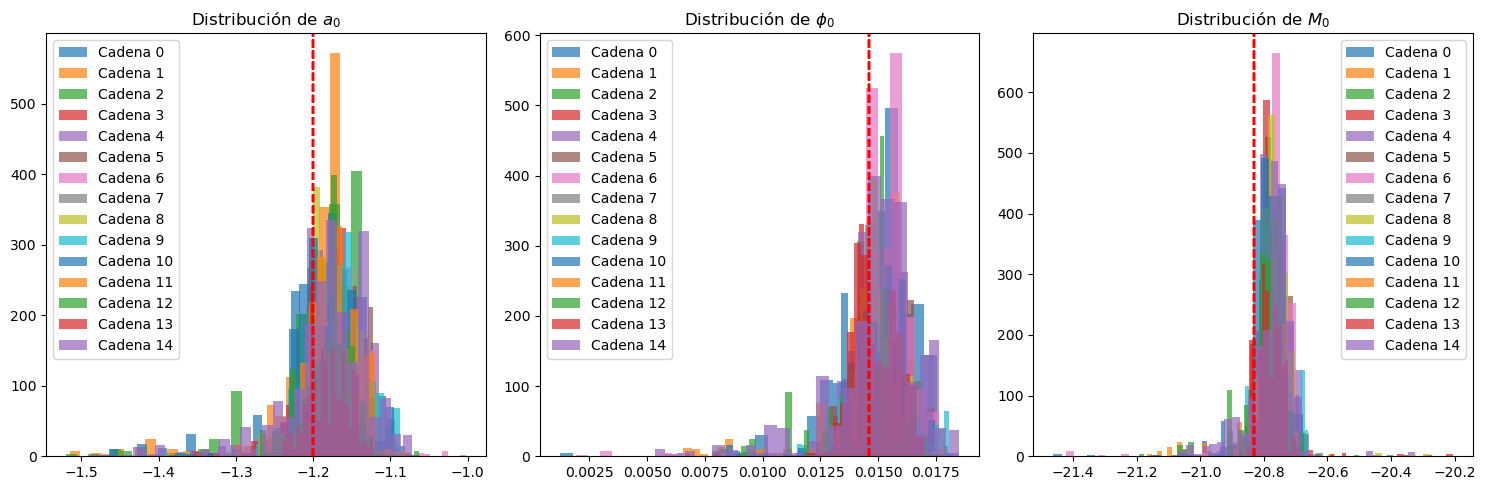

promedio y desviacion standar de a0 -1.1828127666270007 0.055597656683586356
promedio y desviacion standar de M0 -20.77842915813012 0.06651121754077338
promedio y desviacion standar de $phi_0$ 0.014909465900766175 0.0017735452269977347


In [181]:
# Crear una figura con una cuadrícula de subgráficas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila con 3 columnas

# Valores promedio para las líneas verticales
phi0_verdadero = 1.46e-2
a0_verdadero = -1.20
M0_verdadero = -20.83

N = 15
for i in range(N):
    a0 = np.random.uniform(alim[0], alim[1])
    phi0 = np.random.uniform(phi0lim[0], phi0lim[1])
    M0 = np.random.uniform(M0lim[0], M0lim[1])
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
        y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0,
        sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
    )

    # Graficar los histogramas
    axs[0].hist(a0_lista, bins=30, alpha=0.7, label=f'Cadena {i}')
    axs[0].set_title(r"Distribución de $a_0$")
    axs[0].axvline(a0_verdadero, color='r', linestyle='--')
    axs[0].legend()

    axs[1].hist(phi0_lista, bins=30, alpha=0.7, label=f'Cadena {i}')
    axs[1].set_title(r"Distribución de $\phi_0$")
    axs[1].axvline(phi0_verdadero, color='r', linestyle='--')
    axs[1].legend()

    axs[2].hist(M0_lista, bins=30, alpha=0.7, label=f'Cadena {i}')
    axs[2].set_title("Distribución de $M_0$")
    axs[2].axvline(M0_verdadero, color='r', linestyle='--')
    axs[2].legend()

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Promedio de las cadenas
promedio_a0 = np.mean(a0_lista)
D_s_a0=np.std(a0_lista)
promedio_M0 = np.mean(M0_lista)
D_s_M0 = np.std(M0_lista)
promedio_phi0 = np.mean(phi0_lista)
D_s_phi0 = np.std(phi0_lista)
print('promedio y desviacion standar de a0', promedio_a0, D_s_a0)
print('promedio y desviacion standar de M0', promedio_M0, D_s_M0)
print('promedio y desviacion standar de $phi_0$', promedio_phi0, D_s_phi0)

/tmp/ipykernel_144642/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


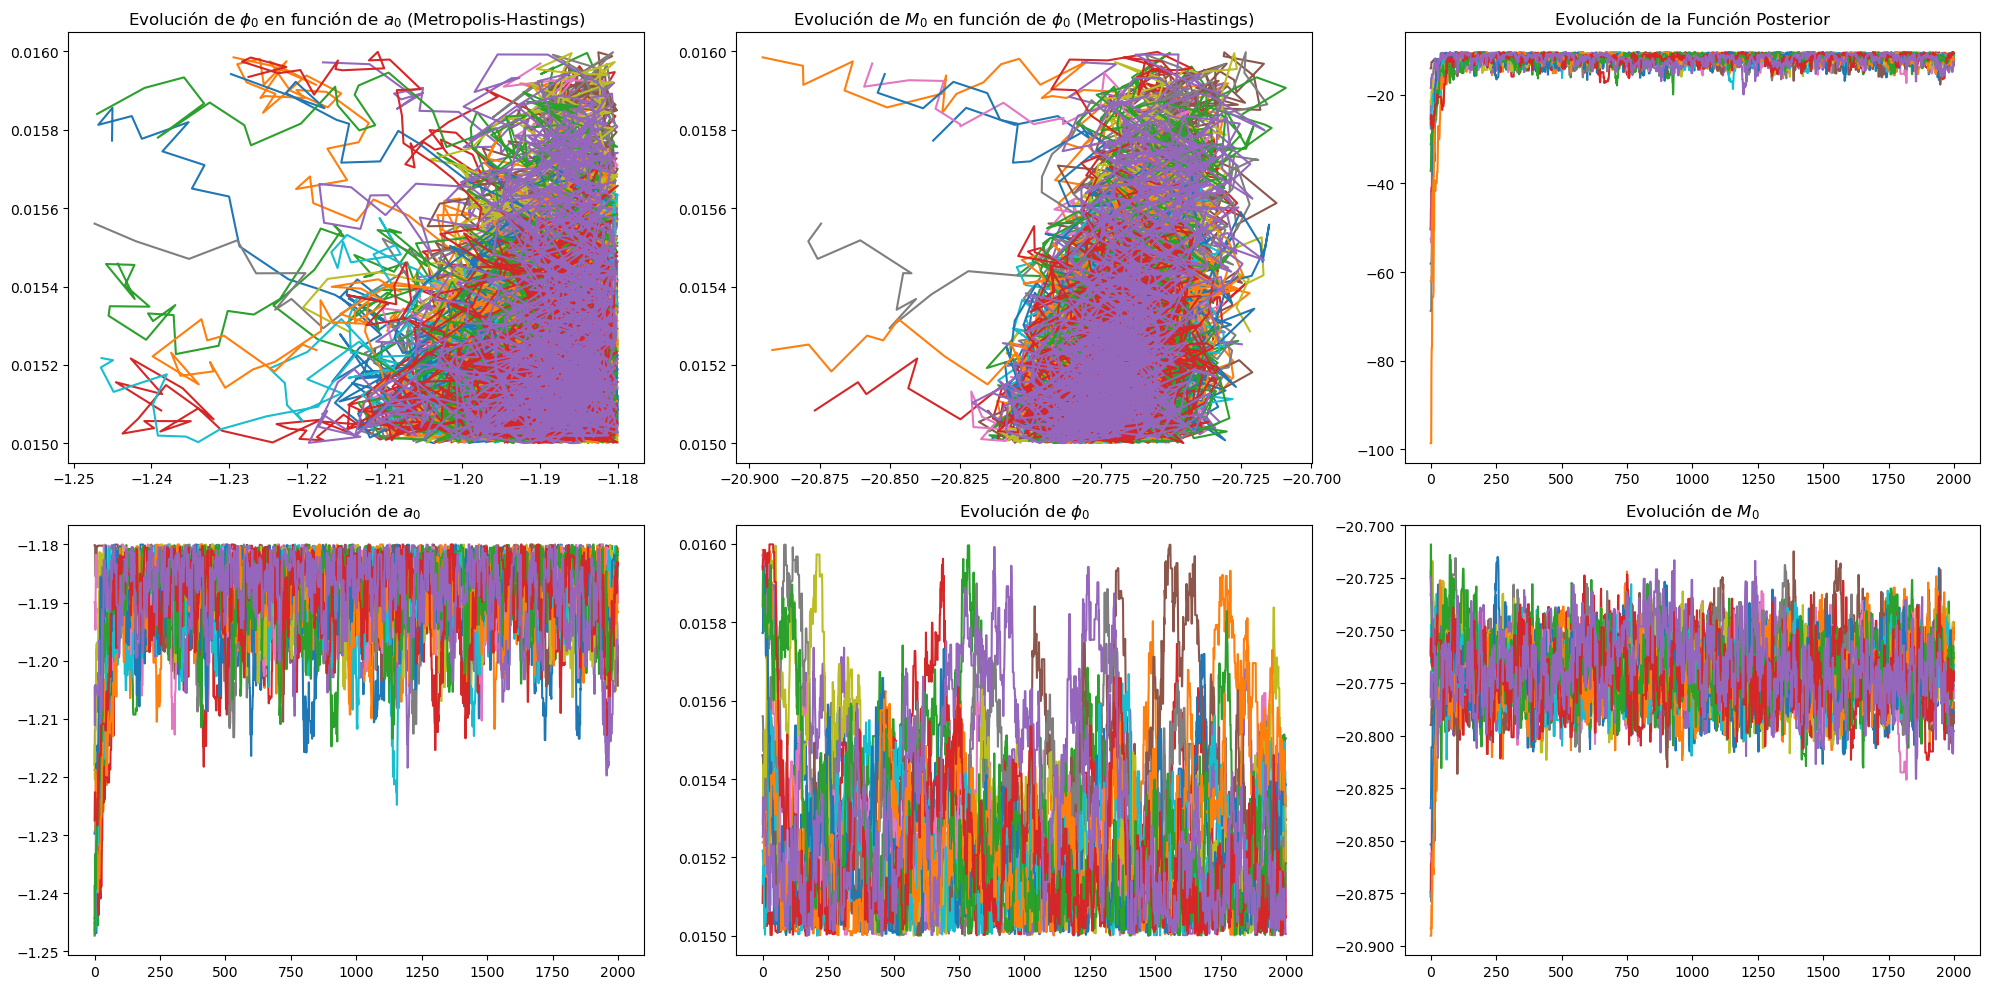

In [180]:
# Crear una figura con una cuadrícula de subgráficas
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Reducir el intervalo de los parámetros para crear malos mezclados
phi0lim_malmezclado = [0.015, 0.016]  # Rango reducido para phi0
M0lim_malmezclado = [-20.9, -20.7]  # Rango reducido para M0
alim_malmezclado = [-1.25, -1.18]  # Rango reducido para a0

N = 15  # Número de cadenas
for i in range(N):
    # Generar parámetros iniciales dentro de un intervalo más pequeño
    a0 = np.random.uniform(alim_malmezclado[0], alim_malmezclado[1])
    phi0 = np.random.uniform(phi0lim_malmezclado[0], phi0lim_malmezclado[1])
    M0 = np.random.uniform(M0lim_malmezclado[0], M0lim_malmezclado[1])

    # Ejecutar el algoritmo de Metropolis-Hastings para cada cadena
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
        y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0,
        sigma=sigma, phi0lim=phi0lim_malmezclado, M0lim=M0lim_malmezclado, alim=alim_malmezclado, N_iter=2000
    )

    # Graficar phi0 vs a0
    axs[0, 0].plot(a0_lista, phi0_lista, label=f'Cadena {i}')
    axs[0, 1].plot(M0_lista, phi0_lista, label=f'Cadena {i}')
    axs[0, 2].plot(posteriores, label="Función Posterior")
    axs[1, 0].plot(a0_lista)
    axs[1, 1].plot(phi0_lista)
    axs[1, 2].plot(M0_lista)

# Etiquetas y títulos
axs[0, 0].set_title(r'Evolución de $\phi_0$ en función de $a_0$ (Metropolis-Hastings)')
axs[0, 1].set_title(r'Evolución de $M_0$ en función de $\phi_0$ (Metropolis-Hastings)')
axs[0, 2].set_title('Evolución de la Función Posterior')
axs[1, 0].set_title(r'Evolución de $a_0$')
axs[1, 1].set_title(r'Evolución de $\phi_0$')
axs[1, 2].set_title(r'Evolución de $M_0$')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_144642/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


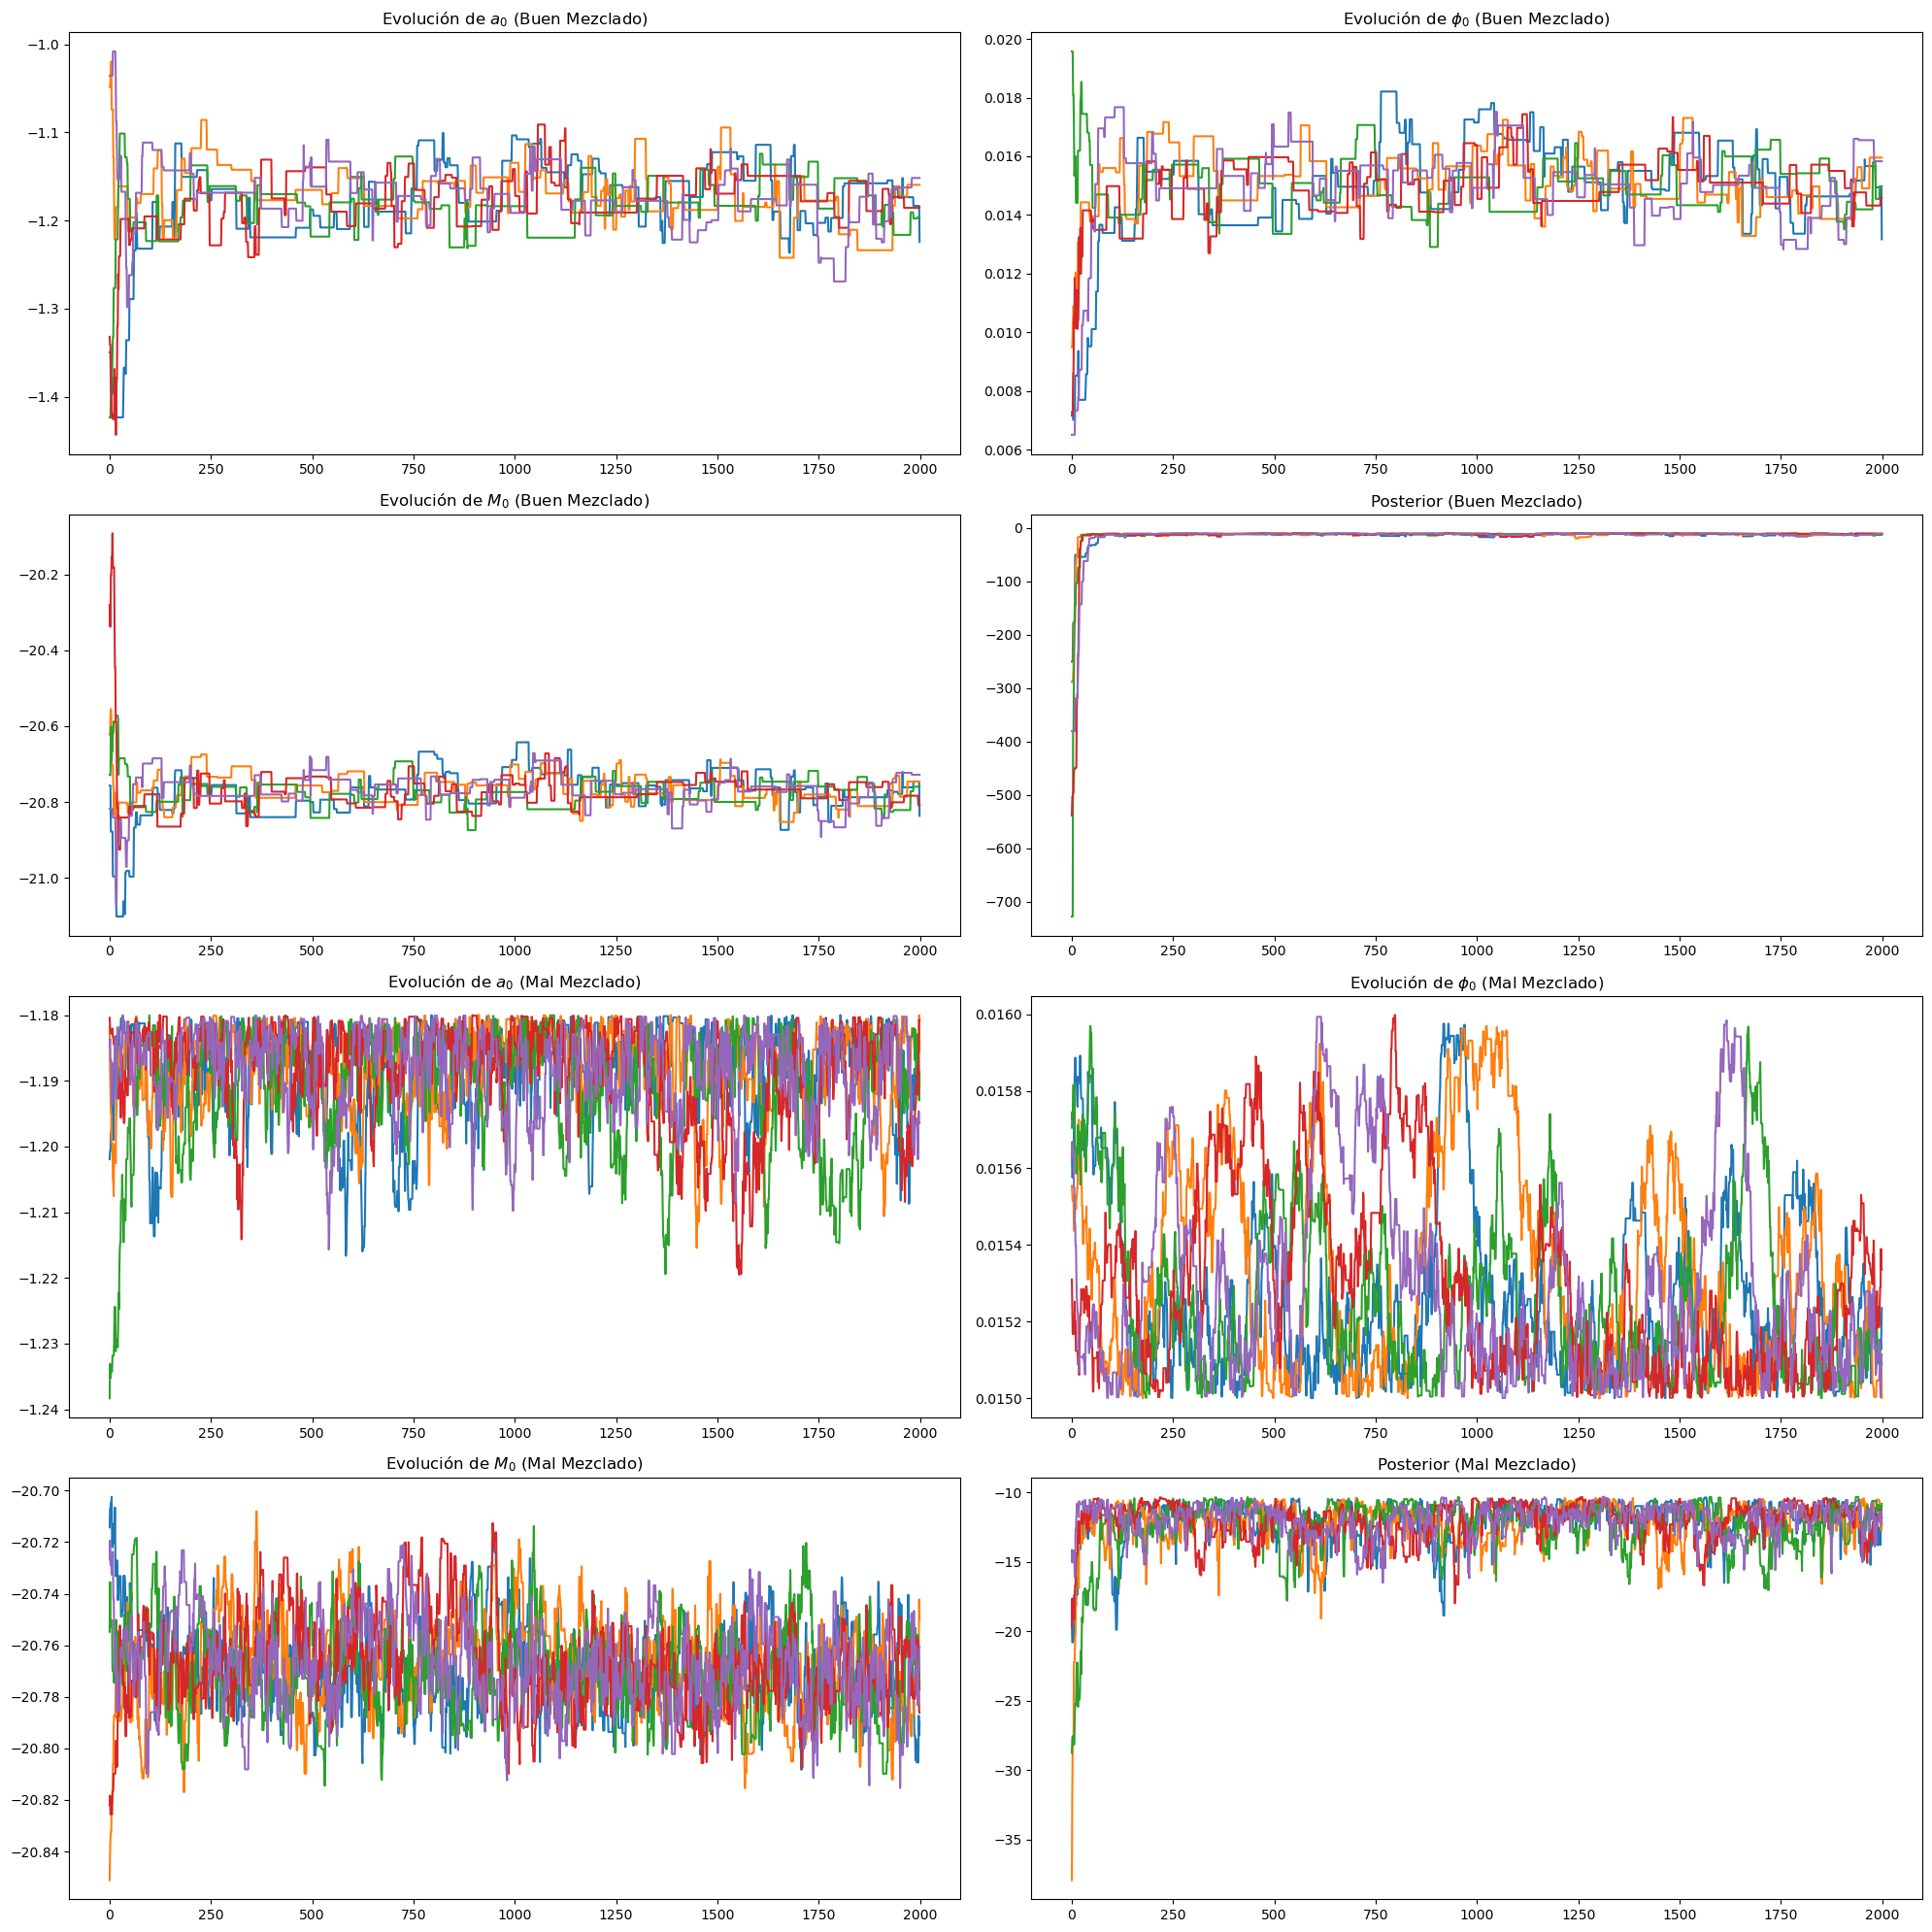

In [179]:
# Creamos una figura con una cuadrícula de subgráficas
fig, axs = plt.subplots(4, 2, figsize=(20, 20))


# Número de cadenas
N = 5

for i in range(N):
    a0 = np.random.uniform(alim[0], alim[1])
    phi0 = np.random.uniform(phi0lim[0], phi0lim[1])
    M0 = np.random.uniform(M0lim[0], M0lim[1])

    # Ejecutamos Metropolis-Hastings
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
        y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0,
        sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
    )

    # Graficar el buen mezclado
    axs[0, 0].plot(a0_lista, label=f'Cadena {i}')
    axs[0, 1].plot(phi0_lista, label=f'Cadena {i}')
    axs[1, 0].plot(M0_lista, label=f'Cadena {i}')
    axs[1, 1].plot(posteriores, label=f'Cadena {i}')

# Parámetros para el mal mezclado (rango reducido)
phi0lim_malmezclado = [0.015, 0.016]
M0lim_malmezclado = [-20.9, -20.7]
alim_malmezclado = [-1.25, -1.18]

for i in range(N):
    a0 = np.random.uniform(alim_malmezclado[0], alim_malmezclado[1])
    phi0 = np.random.uniform(phi0lim_malmezclado[0], phi0lim_malmezclado[1])
    M0 = np.random.uniform(M0lim_malmezclado[0], M0lim_malmezclado[1])

    # Ejecutar Metropolis-Hastings para el mal mezclado
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
        y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0,
        sigma=sigma, phi0lim=phi0lim_malmezclado, M0lim=M0lim_malmezclado, alim=alim_malmezclado, N_iter=2000
    )

    # Graficar el mal mezclado
    axs[2, 0].plot(a0_lista, label=f'Cadena {i}')
    axs[2, 1].plot(phi0_lista, label=f'Cadena {i}')
    axs[3, 0].plot(M0_lista, label=f'Cadena {i}')
    axs[3, 1].plot(posteriores, label=f'Cadena {i}')

# Títulos y etiquetas
axs[0, 0].set_title(r'Evolución de $a_0$ (Buen Mezclado)')
axs[0, 1].set_title(r'Evolución de $\phi_0$ (Buen Mezclado)')
axs[1, 0].set_title(r'Evolución de $M_0$ (Buen Mezclado)')
axs[1, 1].set_title(r'Posterior (Buen Mezclado)')

axs[2, 0].set_title(r'Evolución de $a_0$ (Mal Mezclado)')
axs[2, 1].set_title(r'Evolución de $\phi_0$ (Mal Mezclado)')
axs[3, 0].set_title(r'Evolución de $M_0$ (Mal Mezclado)')
axs[3, 1].set_title(r'Posterior (Mal Mezclado)')



plt.tight_layout() #Acomoda los espacios entre figuras

plt.show()

Ahora queremos implementar el metodo de gradiente descendente.
El gradiente descendente es un método iterativo utilizado para encontrar el mínimo (o máximo) de una función, se emplea para minimizar la verosimilitud marginalizada respecto a cada parámetro. Calculo la derivada y me muevo en una direccion.
Eficiencia en Cálculo: El gradiente descendente es eficiente en problemas de alta dimensionalidad, especialmente cuando se desea minimizar una función compleja como la verosimilitud.
Adaptabilidad: Es un método flexible que se adapta bien a problemas no lineales o que tienen funciones de verosimilitud no convexas.
El método de gradiente descendente se basa en la idea de ir "caminando" en la dirección de mayor descenso en la función, que se define por el gradiente (la derivada de la función con respecto a los parámetros). En cada iteración del método:

Se calcula el gradiente de la función (en este caso, la verosimilitud marginalizada) con respecto a cada parámetro.
Se actualizan los valores de los parámetros en la dirección negativa del gradiente, reduciendo gradualmente el valor de la función.

In [157]:
#primero vamos a tener en cuenta la funcion schester la funcion likehood 
#Debemos definir los gradientes respecto cada parametro
#Defino la funcion schechter, es la misma que mas arriba pero la transcribo para tenerla mas cerca
def schechter(M,phi0,a0,M0):
    a=(0.4)*np.log(10)*phi0
    b=10**((-0.4)*(M-M0)*(a0+1))
    c=np.exp(-10**(-0.4*(M-M0)))
    fun=(a*b*c)
    return(fun)

In [183]:
#Definicion de likehood
sigma= np.abs((datos['error_sup'] + datos['error_inf'])/2) 
def log_likelihood(y, M, phi0, a0, M0, sigma):
    # Calculamos el modelo de Schechter para cada valor de M
    y_modelo = schechter(M, phi0, a0, M0)
    
    # Calculamos la log-verosimilitud
    logL = -0.5 * np.sum(((y - y_modelo)**2)/(sigma**2))  # La constante A está incluida en la normalización
    return logL

In [159]:
# Derivadas parciales de la función de Schechter respecto a los parámetros
def der_schechter_dphi0(M, phi0, a0, M0):
    a = (0.4) * np.log(10)
    b = 10**((-0.4) * (M - M0) * (a0 + 1))
    c = np.exp(-10**(-0.4 * (M - M0)))
    return a * b * c  # Derivada respecto a phi0

# Derivada de Schechter respecto a a0
def der_schechter_da0(M, phi0, a0, M0):
    a = (0.4) * np.log(10) * phi0
    b = 10**((-0.4) * (M - M0) * (a0 + 1))
    c = np.exp(-10**(-0.4 * (M - M0)))
    d = -0.4 * (M - M0) * np.log(10)
    return a * b * c * d

def der_schechter_dM0(M, phi0, a0, M0):
    a = (0.4) * np.log(10) * phi0
    b = 10**((-0.4) * (M - M0) * (a0 + 1))
    c = np.exp(-10**(-0.4 * (M - M0)))
    d = 0.4 * np.log(10) * (a0 + 1) - 0.4 * np.log(10) * 10**(-0.4 * (M - M0))
    return a * b * c * d  # Derivada respecto a M0

In [160]:
print(der_schechter_da0(M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83))
print(der_schechter_dM0(M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83))
print(der_schechter_dphi0(M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83))

0     0.000003
1     0.000010
2     0.000025
3     0.000061
4     0.000111
5     0.000201
6     0.000337
7     0.000502
8     0.000693
9     0.000881
10    0.001051
11    0.001156
12    0.001149
13    0.001016
14    0.000665
15    0.000119
16   -0.000661
17   -0.001611
18   -0.002831
19   -0.004547
20   -0.006233
21   -0.008445
22   -0.010789
23   -0.013243
24   -0.016107
25   -0.019506
26   -0.022584
27   -0.026236
28   -0.029724
29   -0.033986
30   -0.038332
31   -0.042119
32   -0.047052
33   -0.051917
34   -0.057385
35   -0.062911
36   -0.067879
37   -0.074009
38   -0.079777
39   -0.086122
40   -0.093183
41   -0.100109
42   -0.107047
43   -0.114023
44   -0.121898
45   -0.130925
46   -0.139301
Name: MAG, dtype: float64
0    -0.000012
1    -0.000035
2    -0.000082
3    -0.000190
4    -0.000330
5    -0.000570
6    -0.000926
7    -0.001351
8    -0.001860
9    -0.002405
10   -0.002998
11   -0.003582
12   -0.004197
13   -0.004627
14   -0.005078
15   -0.005416
16   -0.005675
17   -0.005848

In [ ]:
# Derivadas parciales de la log-verosimilitud respecto a los parámetros, considerando el -0.5
def der_log_likelihood_dphi0(y, M, phi0, a0, M0, sigma):
    y_modelo = schechter(M, phi0, a0, M0)
    d_y_modelo_dphi0 = der_schechter_dphi0(M, phi0, a0, M0)
    return -np.sum((y - y_modelo) * d_y_modelo_dphi0 / sigma ** 2)

# Derivada de log-verosimilitud respecto a a0
def der_log_likelihood_da0(y, M, phi0, a0, M0, sigma):
    y_modelo = schechter(M, phi0, a0, M0)
    d_sch_da0 = der_schechter_da0(M, phi0, a0, M0)
    d_logL_da0 = -np.sum((y - y_modelo) * d_sch_da0 / (sigma**2))
    return d_logL_da0

def der_log_likelihood_dM0(y, M, phi0, a0, M0, sigma):
    y_modelo = schechter(M, phi0, a0, M0)
    d_y_model_dM0 = der_schechter_dM0(M, phi0, a0, M0)
    return -np.sum((y - y_modelo) * d_y_model_dM0 / sigma ** 2)


In [162]:
print(der_log_likelihood_da0(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma))
print(der_log_likelihood_dphi0(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma))
print(der_log_likelihood_dM0(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma))

-26.444174780037425
8265.47815052
-222.46263995960746


In [184]:
# Función para calcular el gradiente de log-verosimilitud respecto a los parámetros
def gradiente_log_likelihood(y, M, phi0, a0, M0, sigma):
    dL_dphi0 = der_log_likelihood_dphi0(y, M, phi0, a0, M0, sigma)
    dL_da0 = der_log_likelihood_da0(y, M, phi0, a0, M0, sigma)
    dL_dM0 = der_log_likelihood_dM0(y, M, phi0, a0, M0, sigma)
    
    # Retornamos el gradiente como un array de derivadas parciales
    return np.array([dL_dphi0, dL_da0, dL_dM0])

In [185]:
print(gradiente_log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma))

[8265.47815052  -26.44417478 -222.46263996]
